### imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### create data

In [2]:
def create_data(slope, num_samples):
    x = torch.randn(num_samples, 1)
    y = slope * x + torch.randn(num_samples, 1) / 2

    return (x, y)

### build and train model

In [3]:
def build_train_model(x, data, learningRate, numEpochs):
    # build model
    ANNreg = nn.Sequential(
        nn.Linear(1, 1),  # input layer
        nn.ReLU(),  # activation function
        nn.Linear(1, 1),  # output layer
    )

    # loss function
    lossfun = nn.MSELoss()

    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

    # Train the model!
    for epochi in range(numEpochs):
        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat, y)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    y_hat = ANNreg(x)
    cost = (y_hat - data).pow(2).mean()
    correlation = np.corrcoef(data.T, y_hat.detach().T)[0, 1]
    correlation = 0 if np.isnan(correlation) else correlation

    return (cost.item(), correlation)

### parametric experiment

In [ ]:
# parametric experiment
iterations = 50
num_slopes = 21
slopes = torch.linspace(-5, 5, num_slopes)

costs = torch.zeros(iterations, num_slopes)
corrs = torch.zeros(iterations, num_slopes)

for idx, slope in enumerate(slopes):
    for iter in range(iterations):
        x, y = create_data(slope, 50)
        costs[iter, idx], corrs[iter, idx] = build_train_model(x, y, 0.05, 100)
        print(f"Finished iteration {iter+1:02} for slope {slope:.02}")
    print()

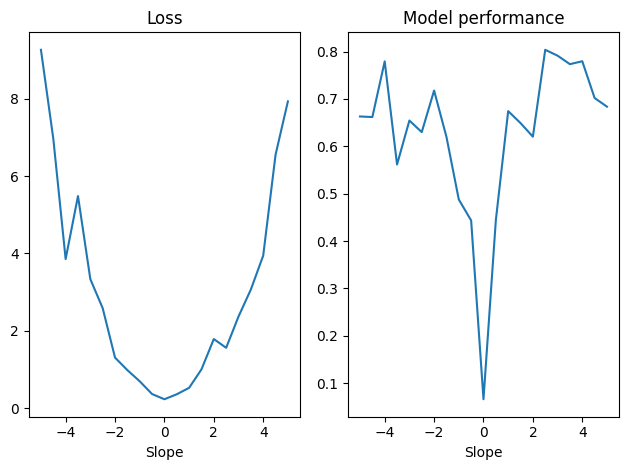

In [5]:
costs = torch.sum(costs, dim=0) * iterations**-1
corrs = torch.sum(corrs, dim=0) * iterations**-1

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.plot(slopes, costs)
ax0.set_xlabel("Slope")
ax0.set_title("Loss")
ax1.plot(slopes, corrs)
ax1.set_xlabel("Slope")
ax1.set_title("Model performance")
plt.tight_layout()
plt.show()